In [1]:
# from sklearn.datasets import load_digits

# dataset = load_digits()
# features = dataset["data"]
# target = dataset["target"]

from torchvision import datasets
from torchvision import transforms

train_dataset = datasets.MNIST(
    root="./", train=True, download=True,
    transform=transforms.ToTensor()
)

test_dataset = datasets.MNIST(
    root="./", train=False, download=True,
    transform=transforms.ToTensor()
)

samples = train_dataset.data.numpy()
target = train_dataset.targets.numpy()

test_samples = test_dataset.data.numpy()
test_target = test_dataset.targets.numpy()

samples = samples / 255.  #  * 2. - 1.  # 在 [-1, 1] 之间
samples = samples.reshape(-1, 28 * 28)

test_samples = test_samples / 255.
test_samples = test_samples.reshape(-1, 28 * 28)

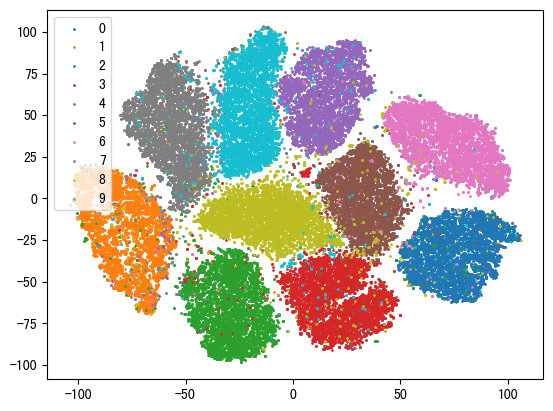

In [2]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE


def draw_tsne_dist(samples, classes, colors):
    samples = TSNE(n_components=2).fit_transform(samples)
    
    for class_, color in enumerate(colors):
        sub_samples = samples[classes == class_]
        plt.scatter(sub_samples[:, 0], sub_samples[:, 1], s=1, color=color, label=class_)

    plt.legend()
    plt.show()

colors = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
    'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
]


draw_tsne_dist(samples, target, colors)

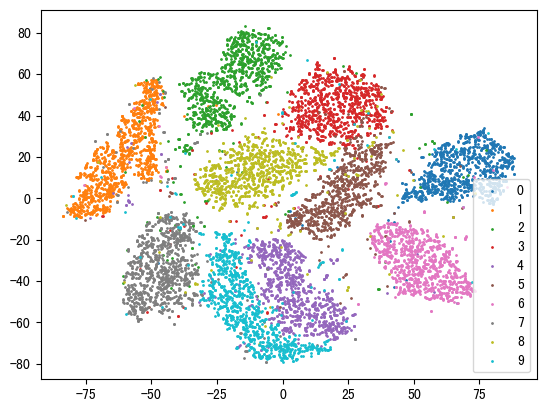

In [3]:
draw_tsne_dist(test_samples, test_target, colors)

In [5]:
from sklearn.neural_network import MLPClassifier

shallow_model = MLPClassifier(hidden_layer_sizes=(1000, )).fit(samples, target)
shallow_model.score(test_samples, test_target)

0.9821

In [6]:
from sklearn.neural_network import MLPClassifier

deep_model = MLPClassifier(hidden_layer_sizes=(1000, 1000)).fit(samples, target)
deep_model.score(test_samples, test_target)

0.9844

In [7]:
from sklearn.neural_network import MLPClassifier

deep_model = MLPClassifier(hidden_layer_sizes=(1000, 1000, 100)).fit(samples, target)
deep_model.score(test_samples, test_target)

0.9814

In [9]:
from sklearn.neural_network import MLPClassifier

deep_model = MLPClassifier(hidden_layer_sizes=(1000, 1000), activation="logistic").fit(samples, target)
deep_model.score(test_samples, test_target)

0.9839

In [40]:
import numpy as np 


def sigmoid(a):
    return 1. / (1. + np.exp(-a))


def softmax(a, axis=0):
    a = np.exp(a - np.max(a, axis=axis, keepdims=True))
    return a / a.sum(axis=axis, keepdims=True)


weight0 = deep_model.coefs_[0]
bias0 = deep_model.intercepts_[0]
result0 = test_samples @ weight0 + bias0
output0 = sigmoid(result0)

weight1 = deep_model.coefs_[1]
bias1 = deep_model.intercepts_[1]
result1 = output0 @ weight1 + bias1
output1 = sigmoid(result1)

weight2 = deep_model.coefs_[2]
bias2 = deep_model.intercepts_[2]
result2 = output1 @ weight2 + bias2
output2 = softmax(result2, axis=1)

assert np.allclose(deep_model.predict_proba(test_samples), output2)

print(f"第一个隐藏层输出的平均值是 {np.mean(output0)}")
print(f"第二个隐藏层输出的平均值是 {np.mean(output1)}")

第一个隐藏层输出的平均值是 0.1483358304292025
第二个隐藏层输出的平均值是 0.3668622972371542


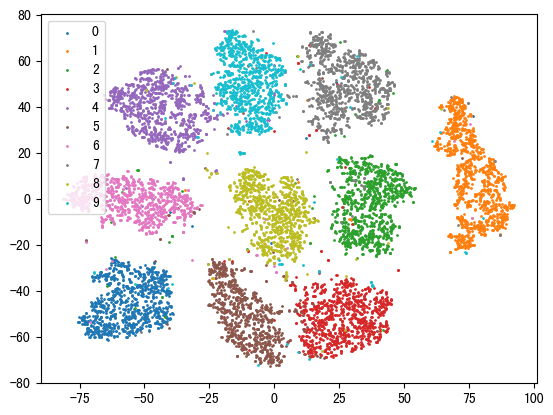

In [33]:
draw_tsne_dist(output0, test_target, colors)

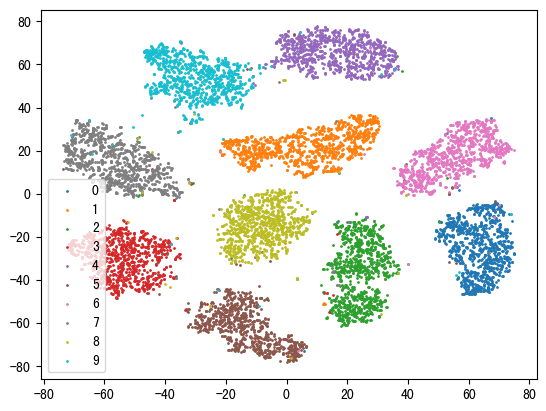

In [34]:
draw_tsne_dist(output1, test_target, colors)